In [1]:
import os
os.chdir(r'E:\01 TLS\03 CODEX analysis\07 mask generation\ark-analysis-main\src')

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Sat Apr 13 09:31:36 2024

@author: Handsome Lee 
This script is used to identified TLS using DBSCAN
"""


import os
import pandas as pd
from alpineer import io_utils
from ark.utils.plot_utils import cohort_cluster_plot, color_segmentation_by_stat
import natsort as ns
import ark.settings as settings
import colorcet as cc
import colorcet
from matplotlib import colormaps
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv(r'238966 TLS celltype.csv')

In [29]:
data = data[~data['celltype'].isin(['Heptocyte','Artifact'])]

In [30]:
data = data[['label','centroid.0','centroid.1','fov','celltype']]

In [31]:
data['celltype'].unique()

array(['Macrophage', 'Others', 'CD8T', 'Neutrophil', 'CD4T', 'B',
       'Fibroblast', 'Endothelial', 'Bile_Duct'], dtype=object)

In [ ]:

unique_fovs = data['fov'].unique()
data['cluster_label'] = -2
for fov in unique_fovs:
    test_data = data[data['fov'] == fov]
    X = test_data[['centroid.0', 'centroid.1']].values
    dbscan = DBSCAN(eps=80, min_samples=50)
    labels = dbscan.fit_predict(X)
    data.loc[data['fov'] == fov, 'cluster_label'] = labels
data.to_csv(r'164697 after dbscan.csv')


C:\Users\DELL\AppData\Local\Temp\ipykernel_29644\498101013.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cell_cluster.rename(columns={'cluster_label': 'cell_meta_cluster'}, inplace=True)


Cluster Mask Generation:   0%|          | 0/7 [00:00<?, ?FOVs/s]

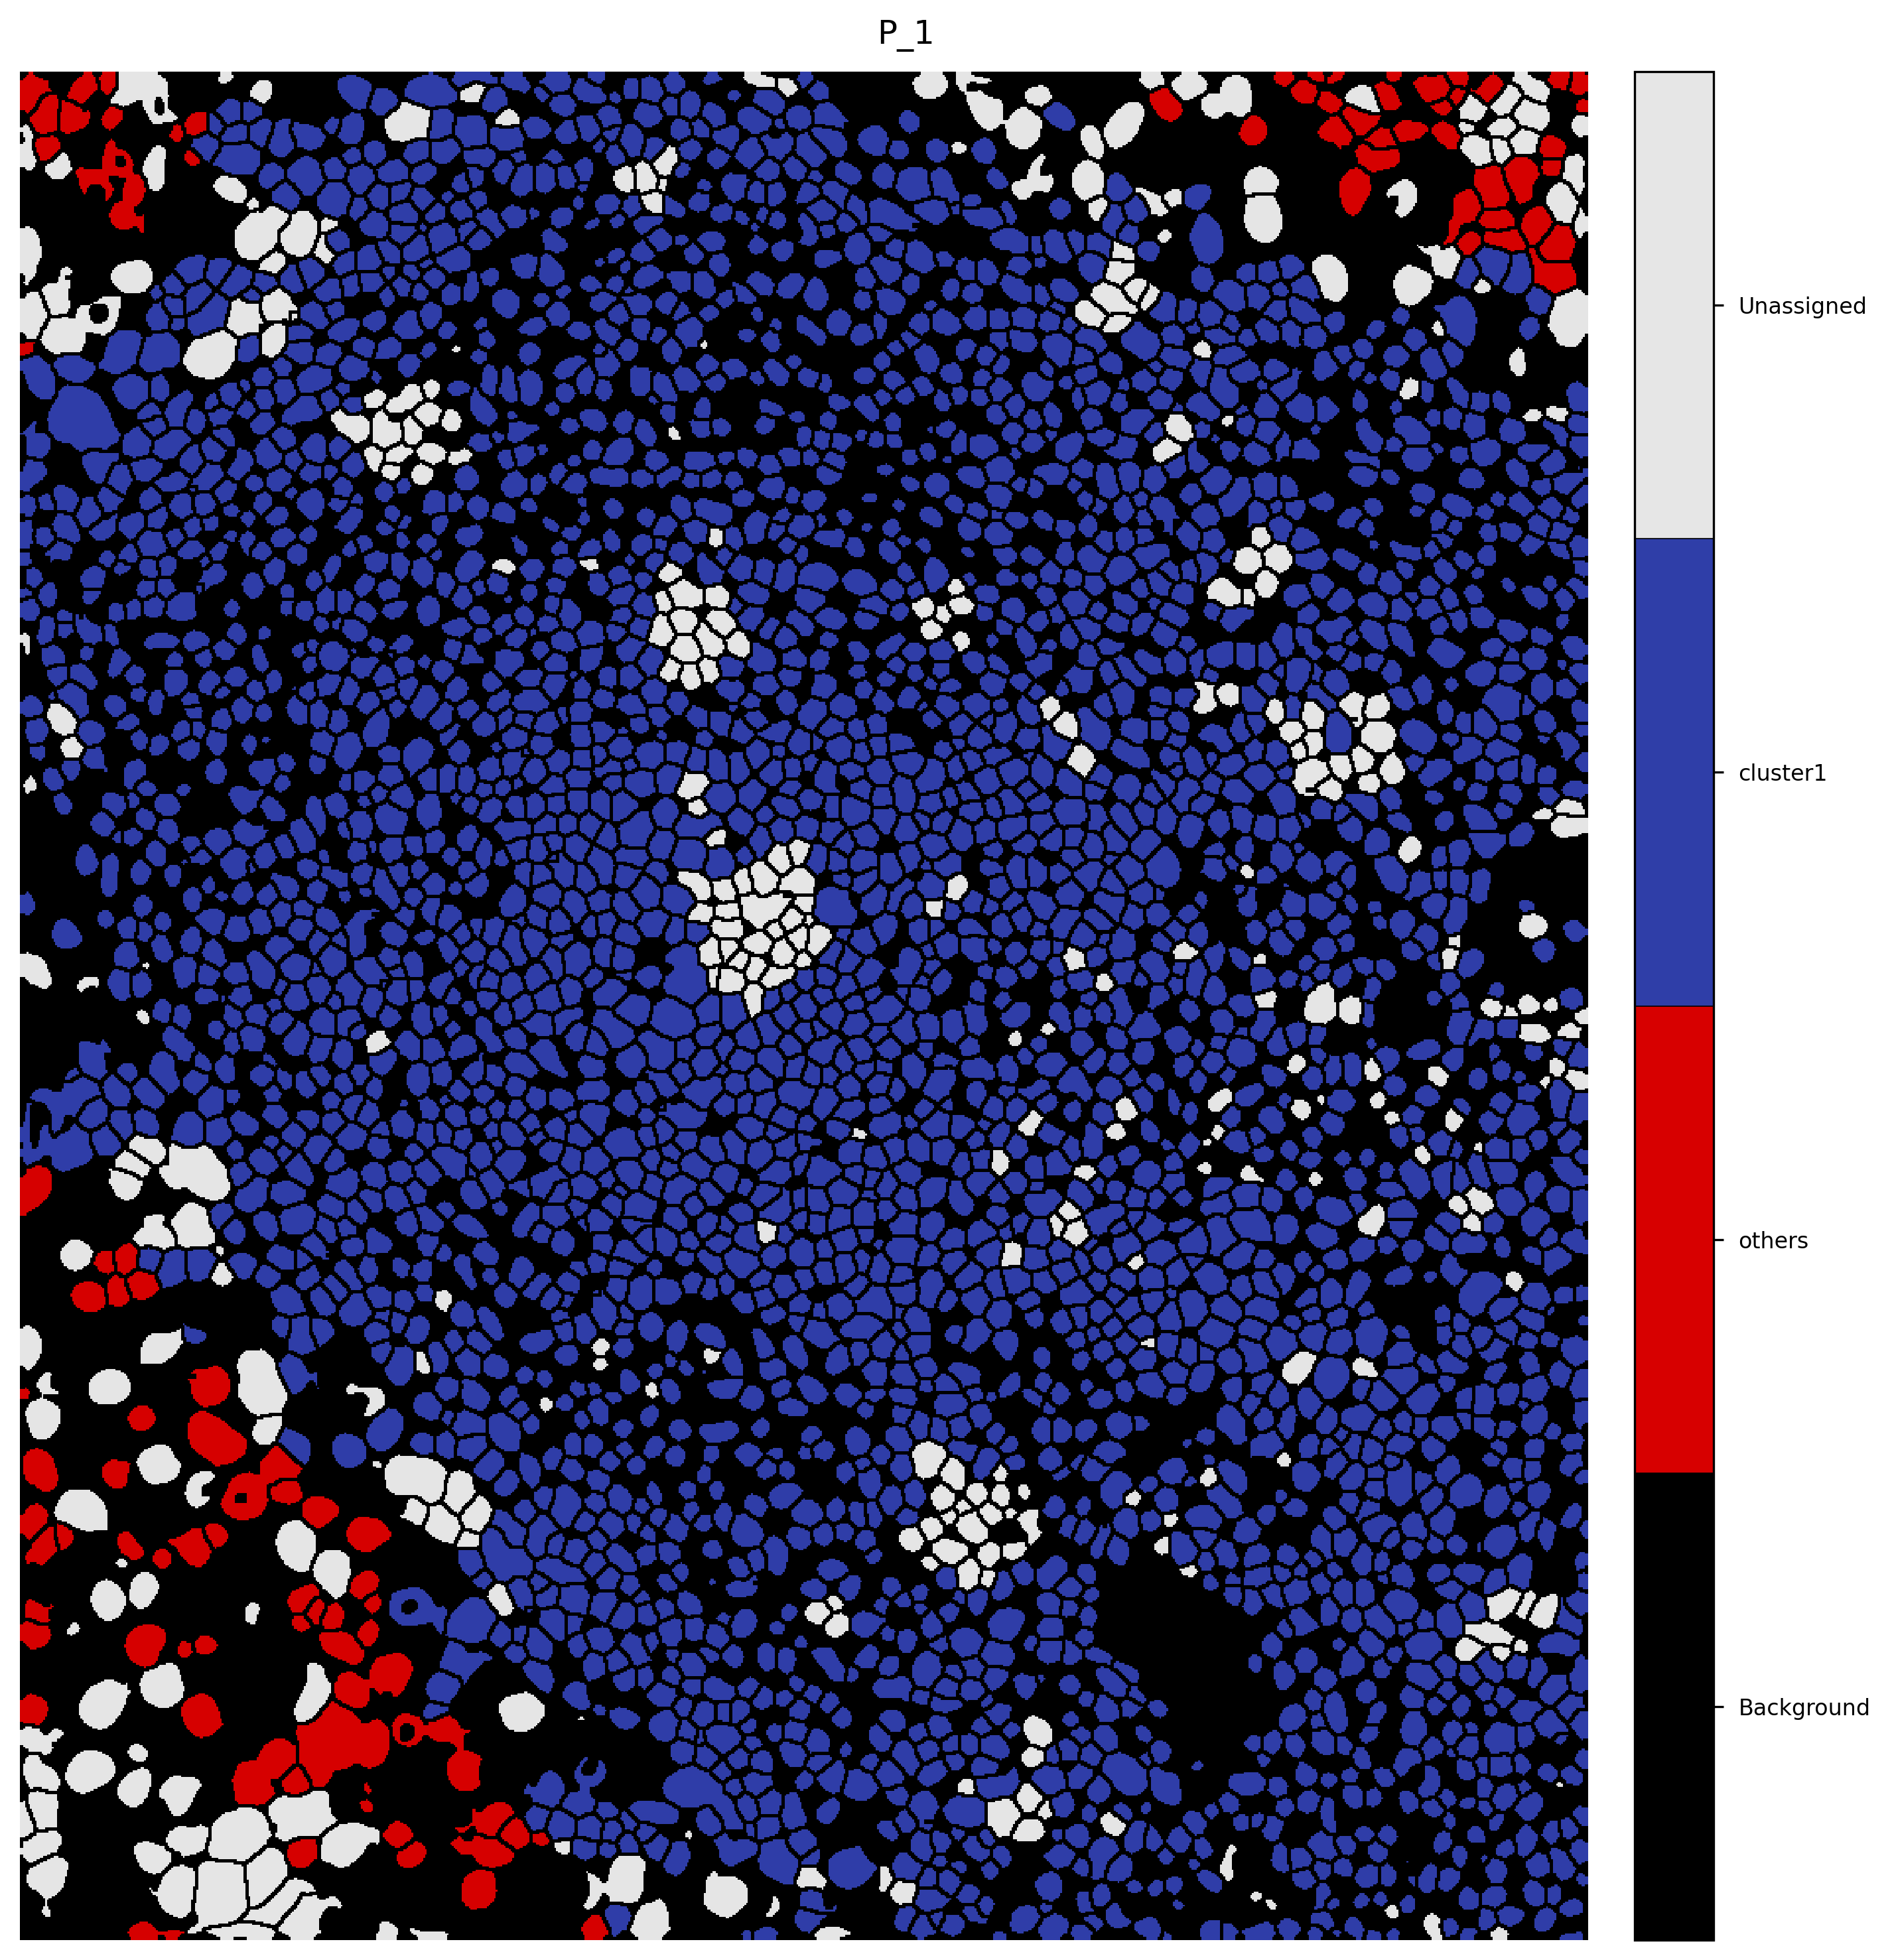

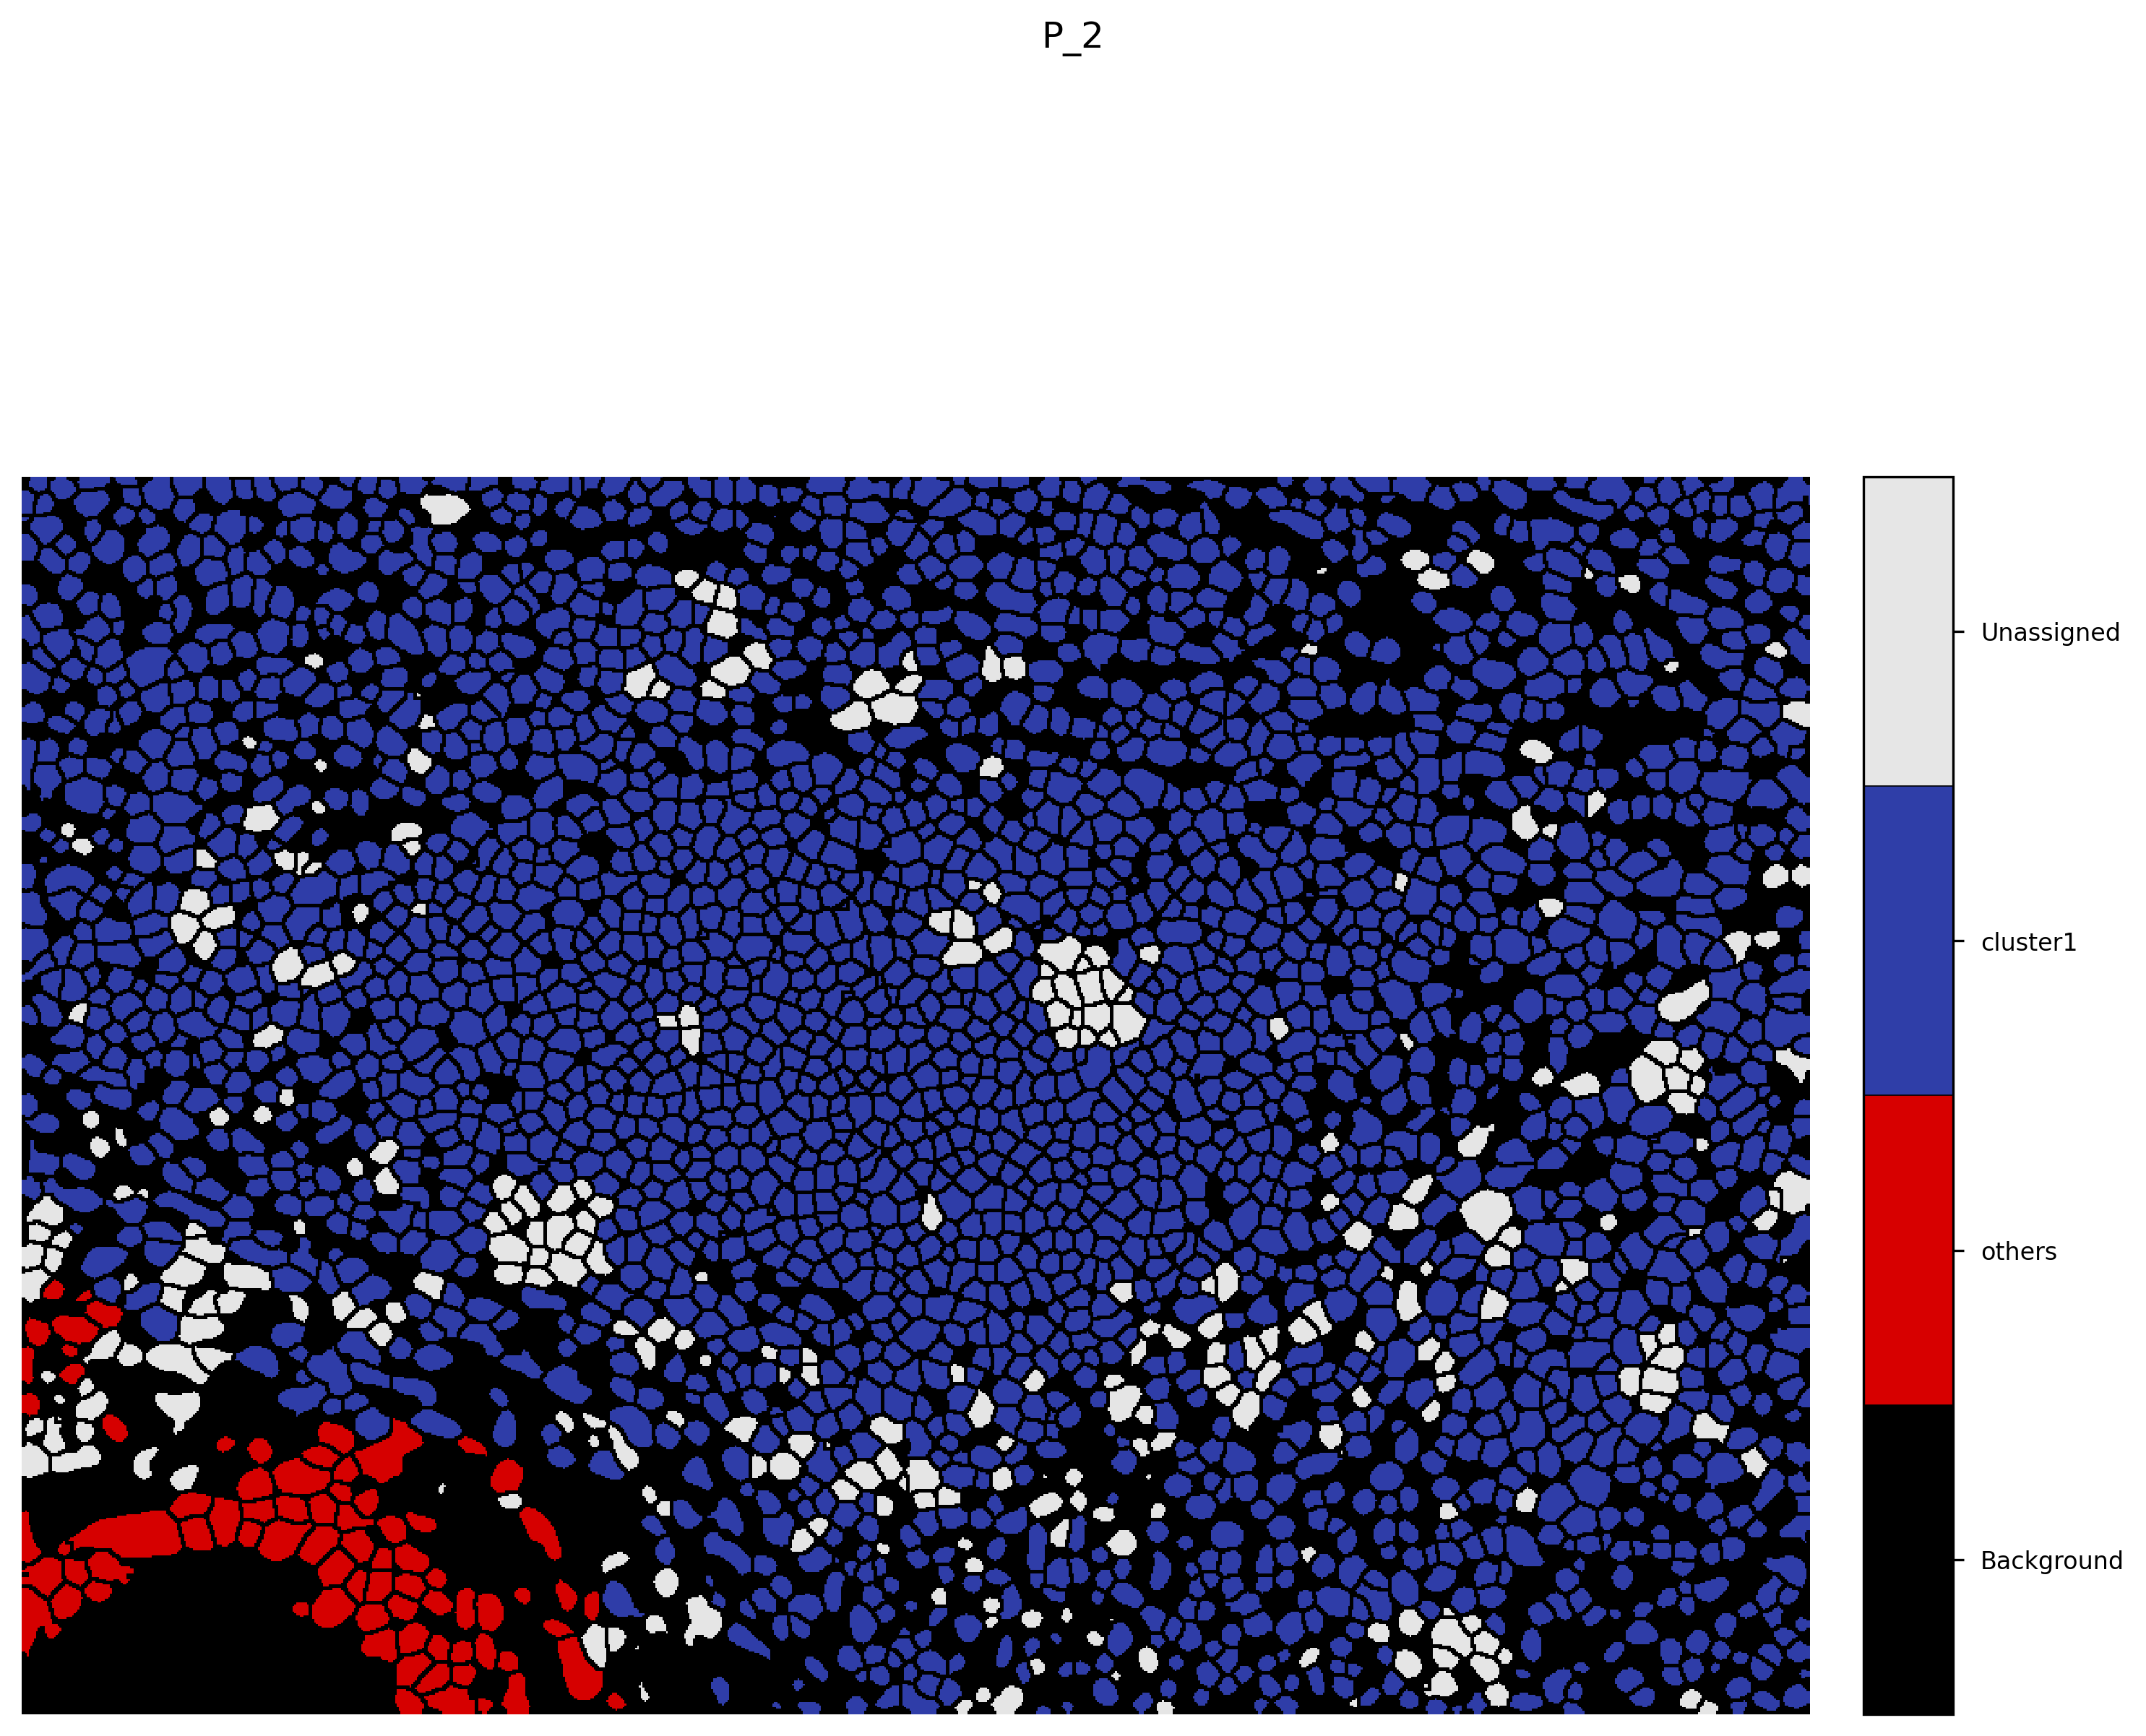

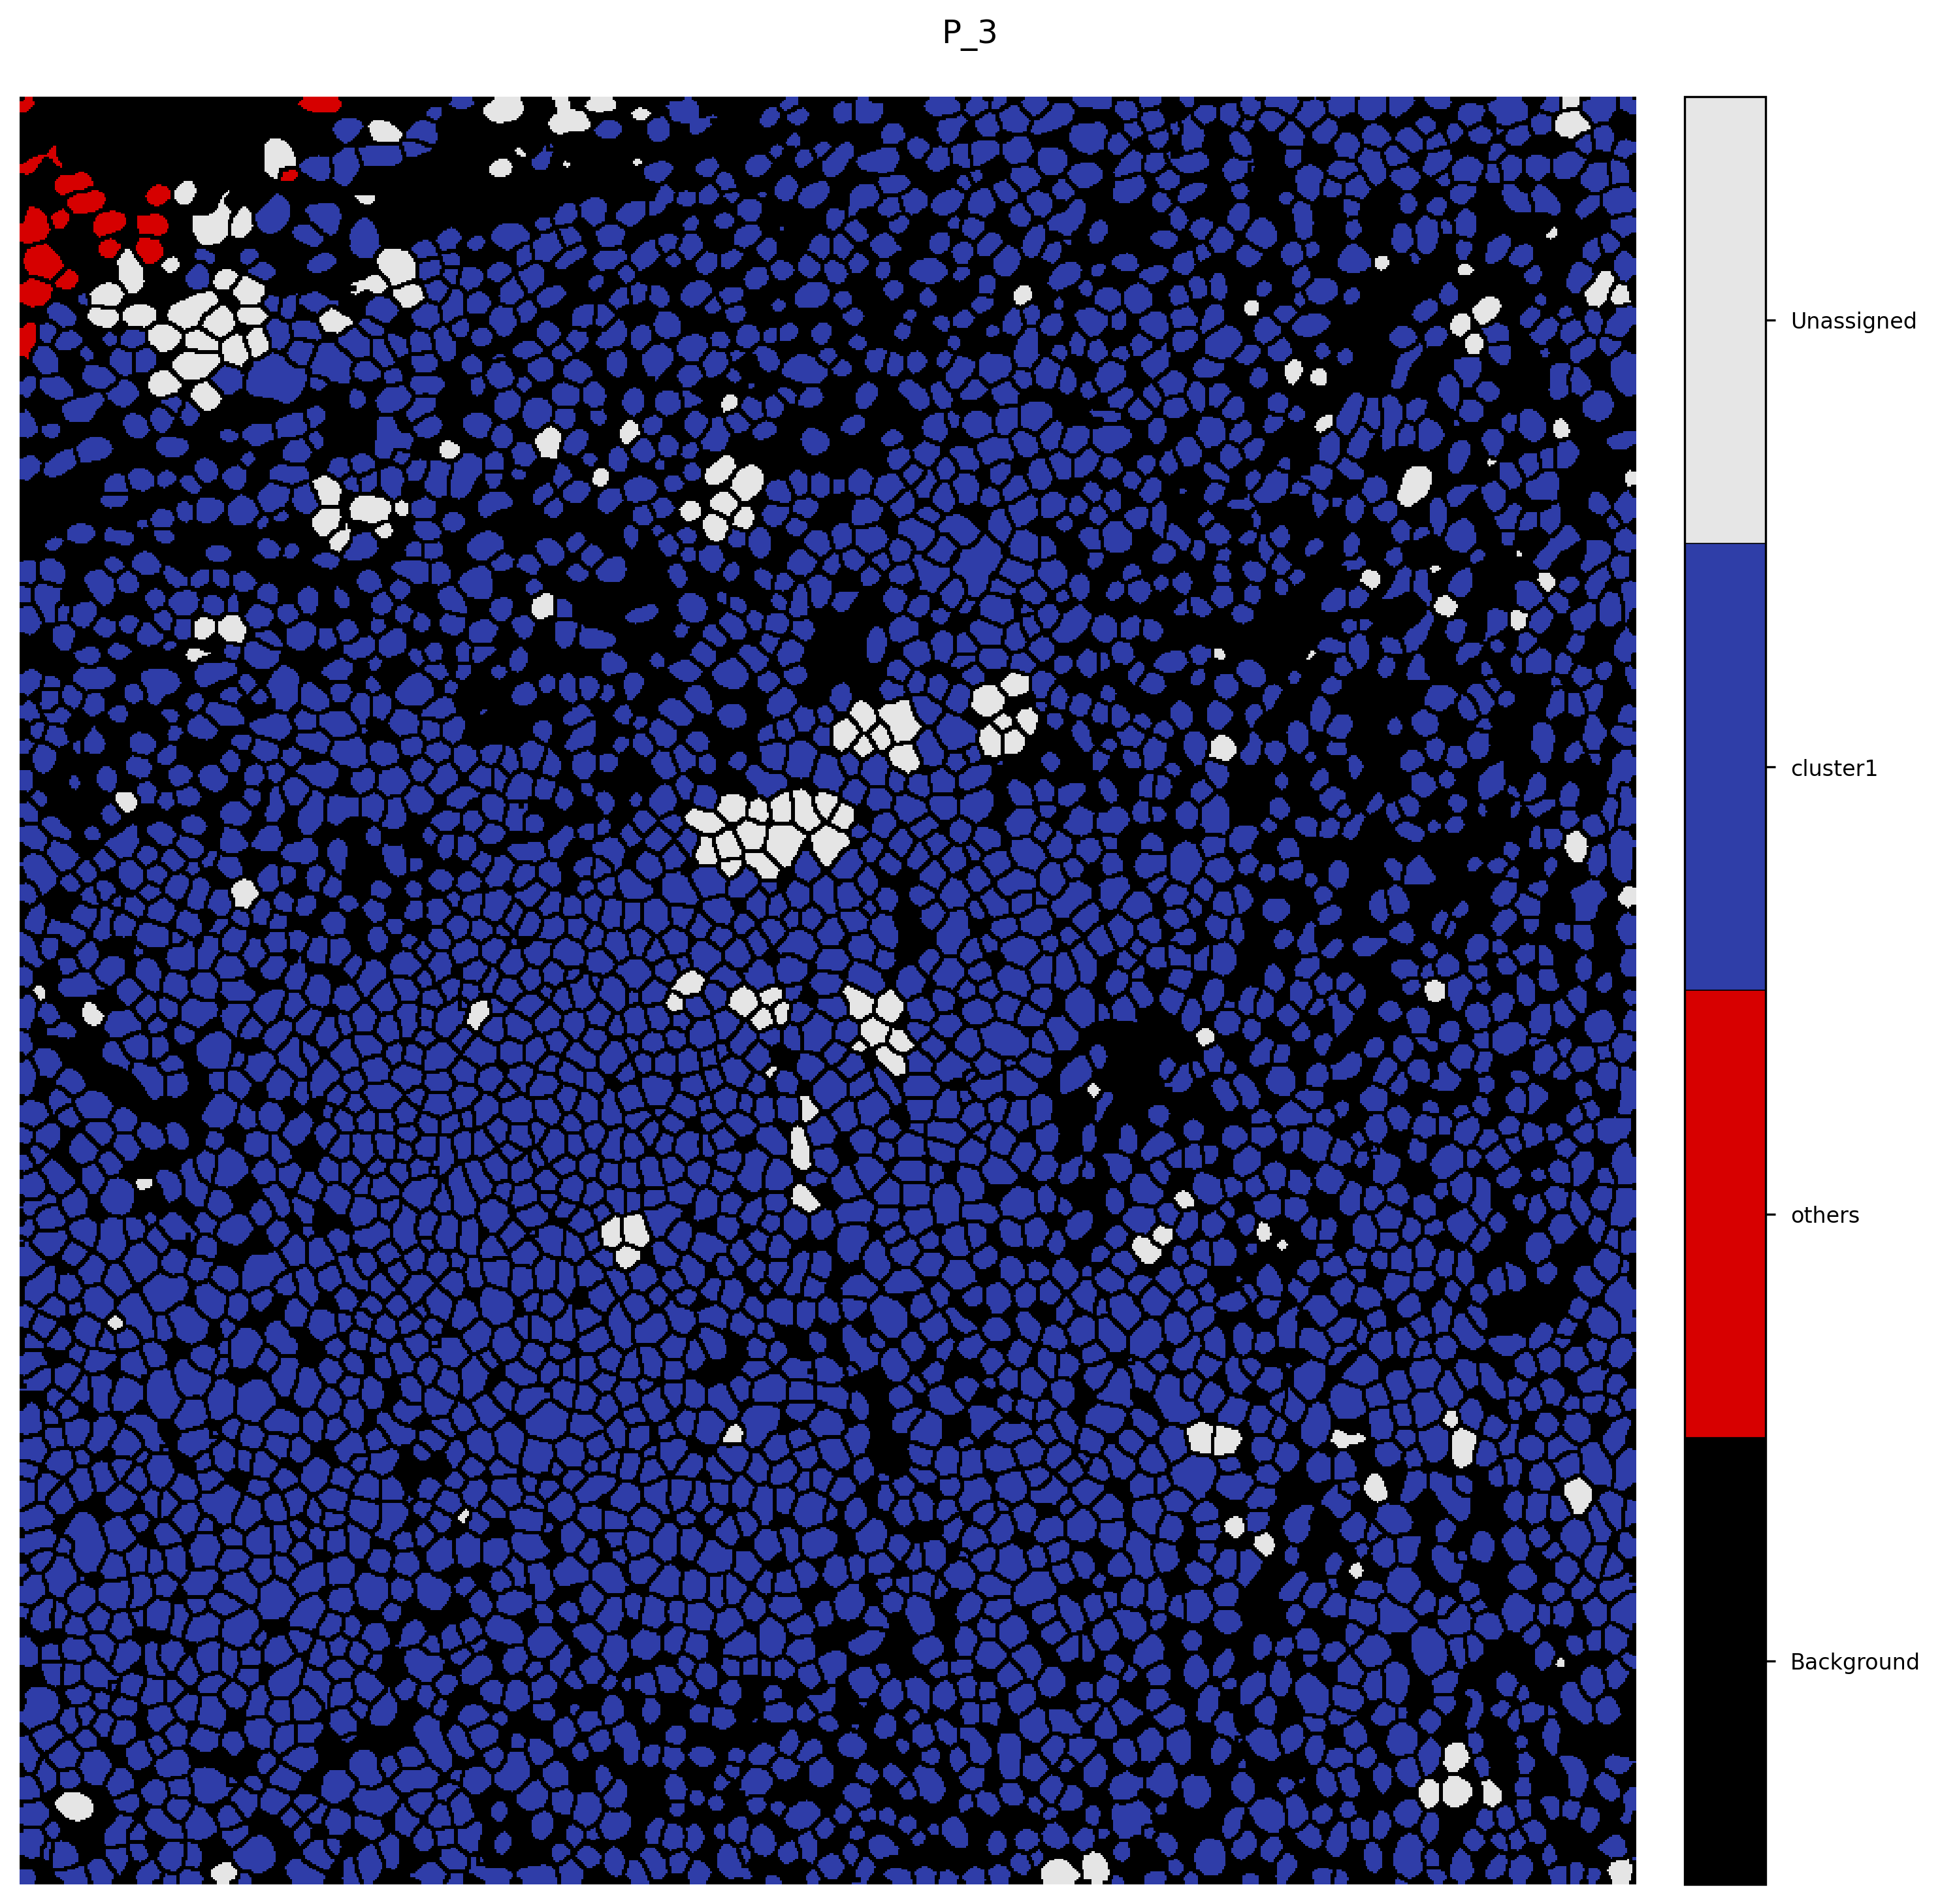

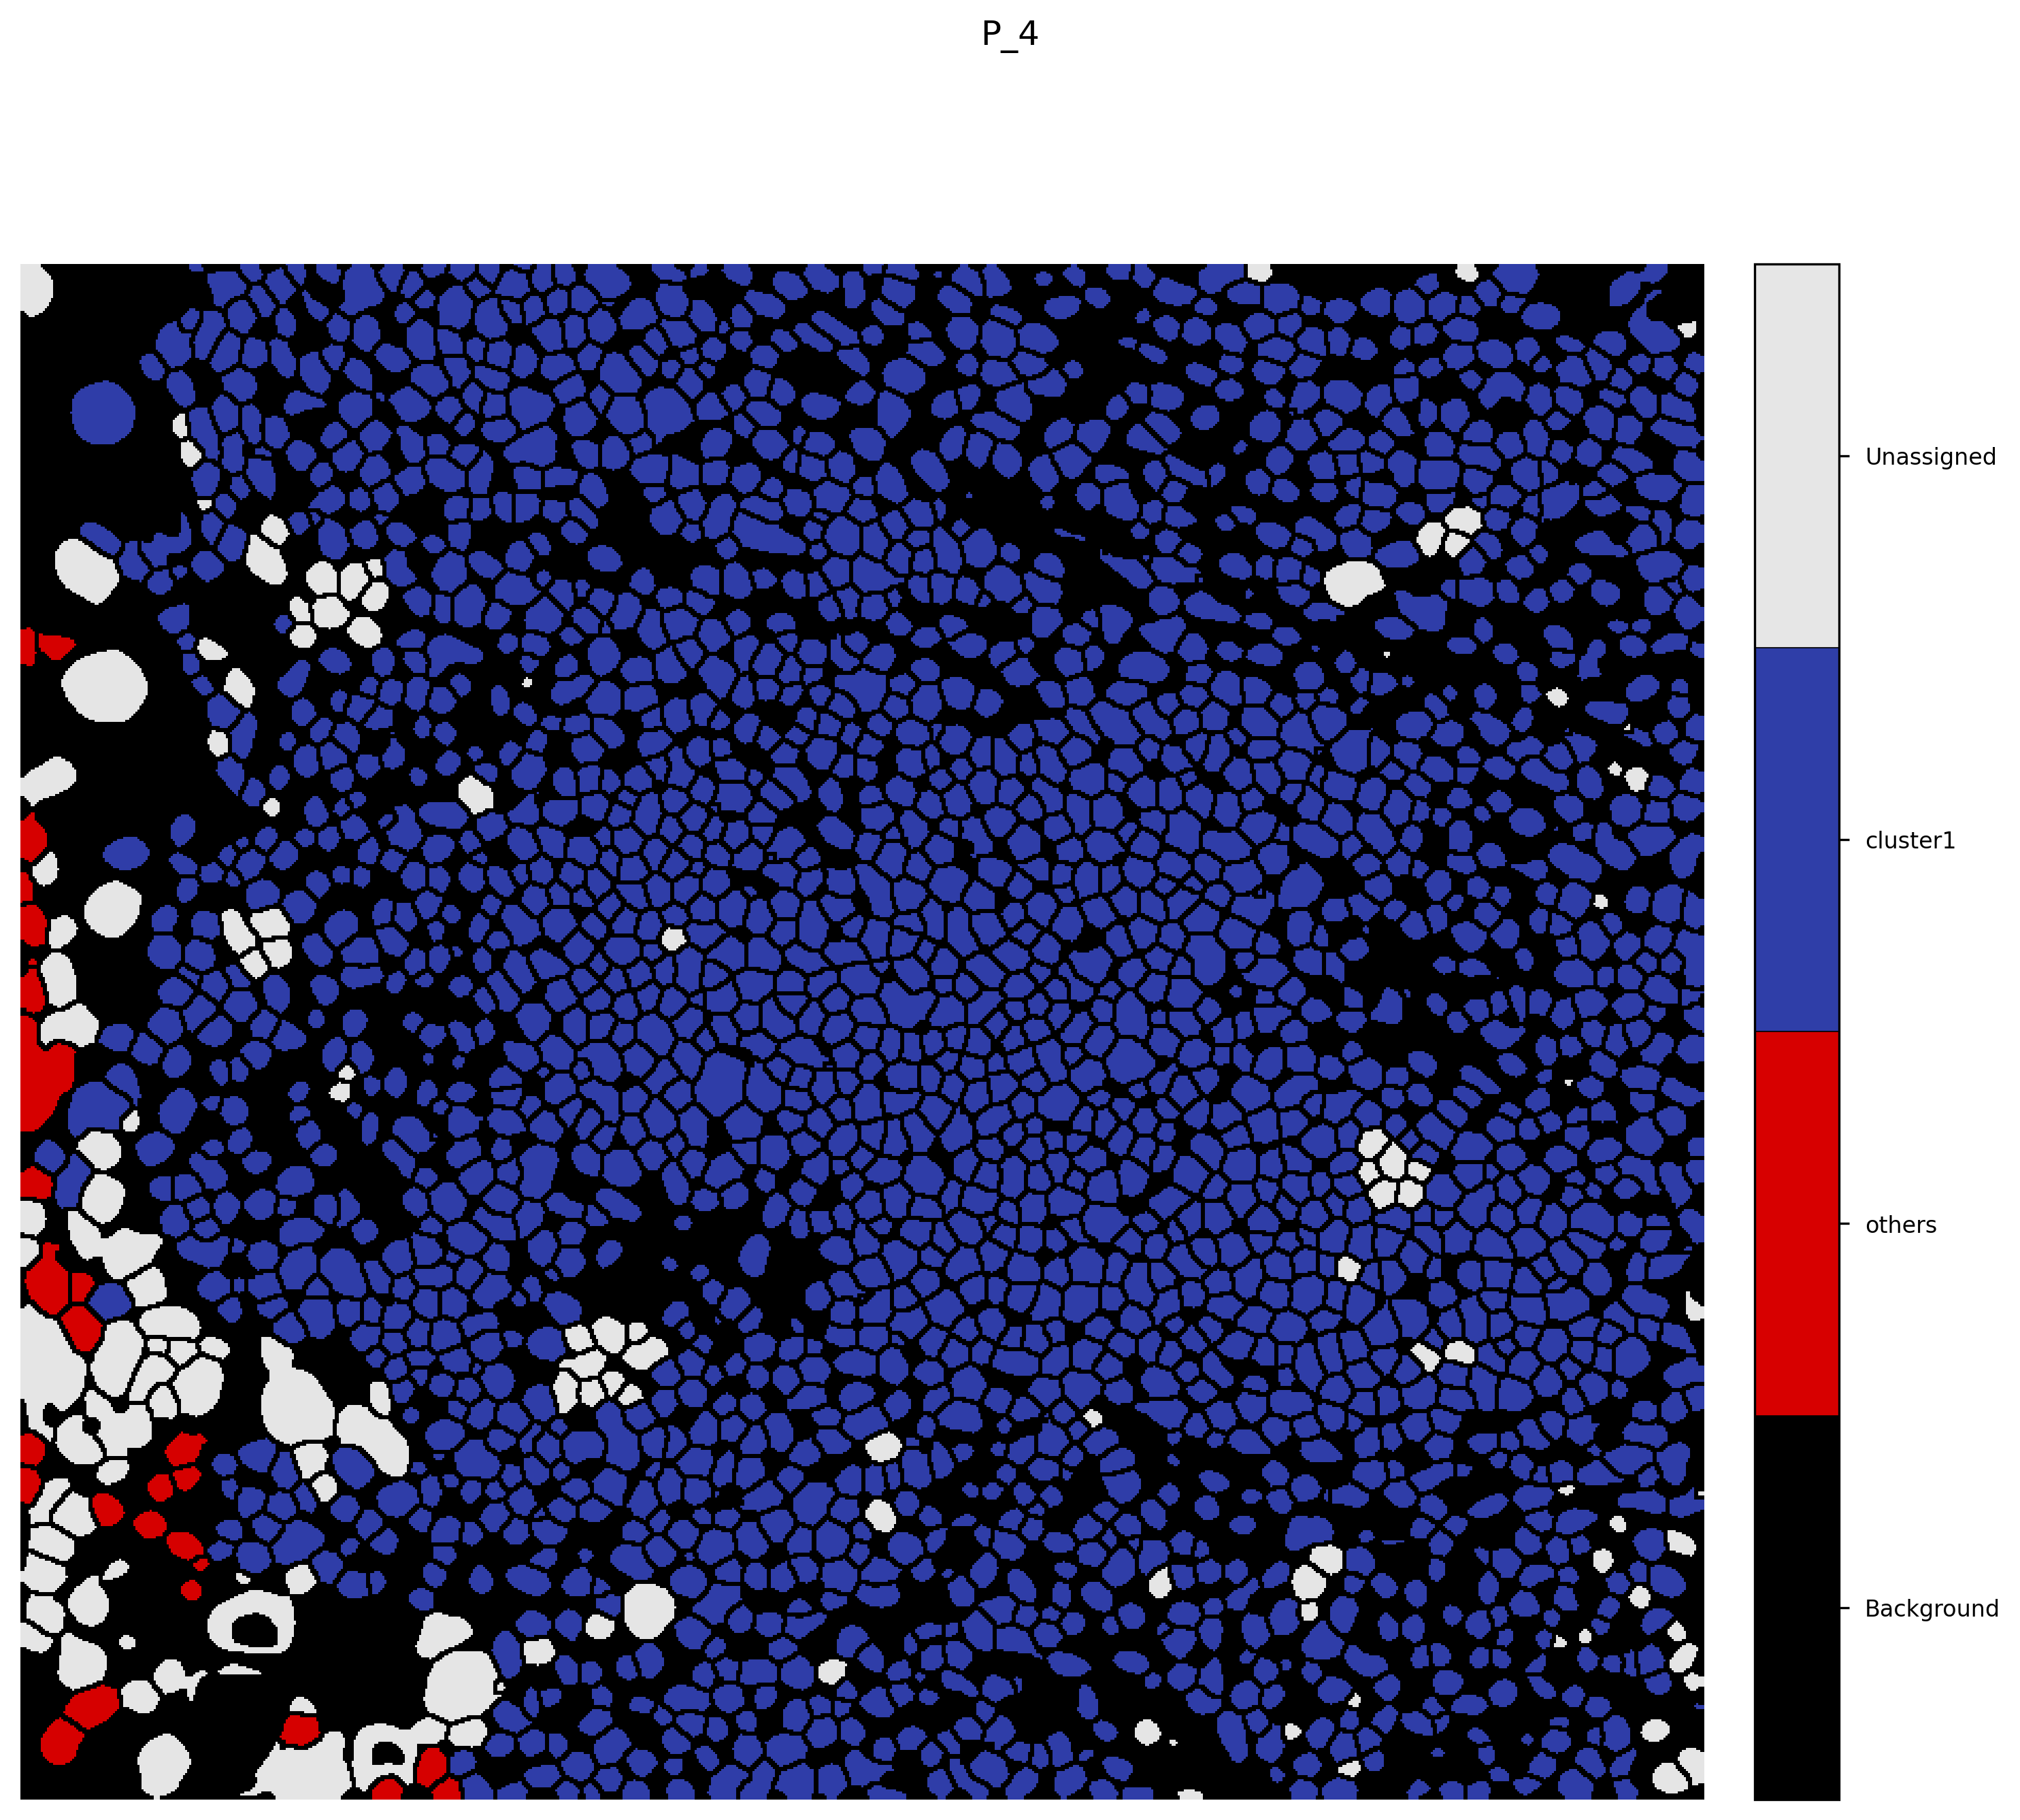

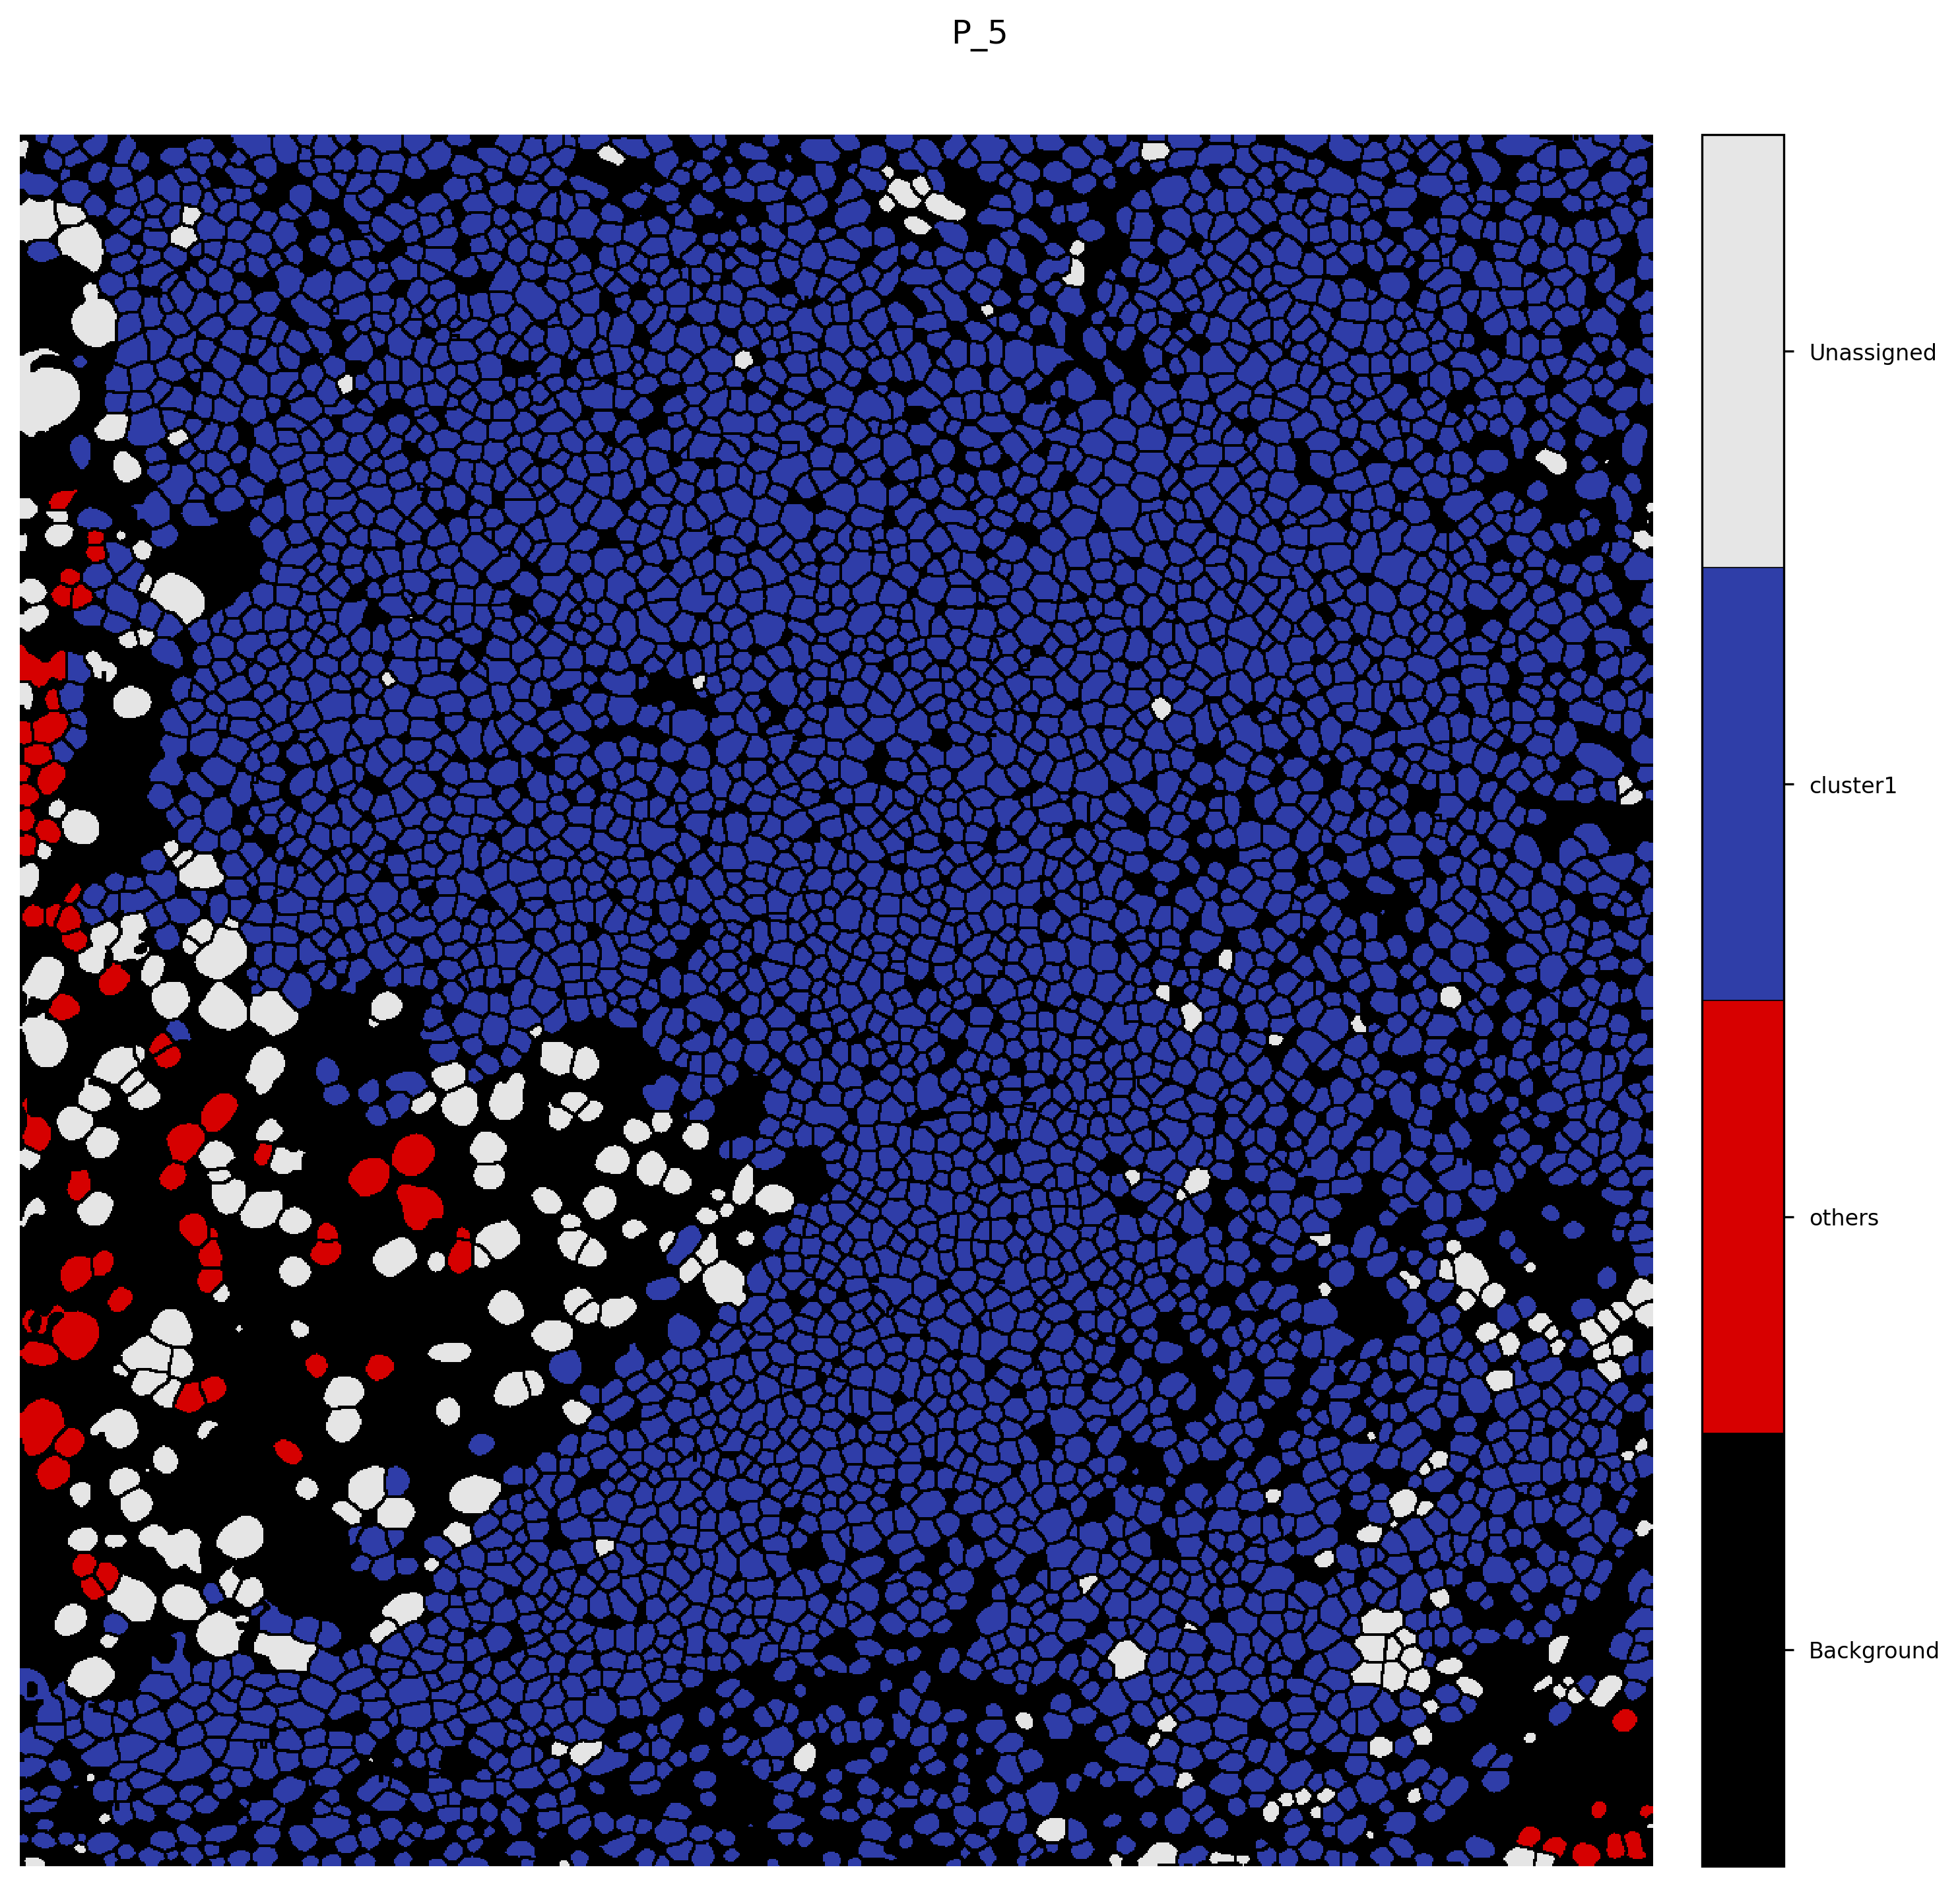

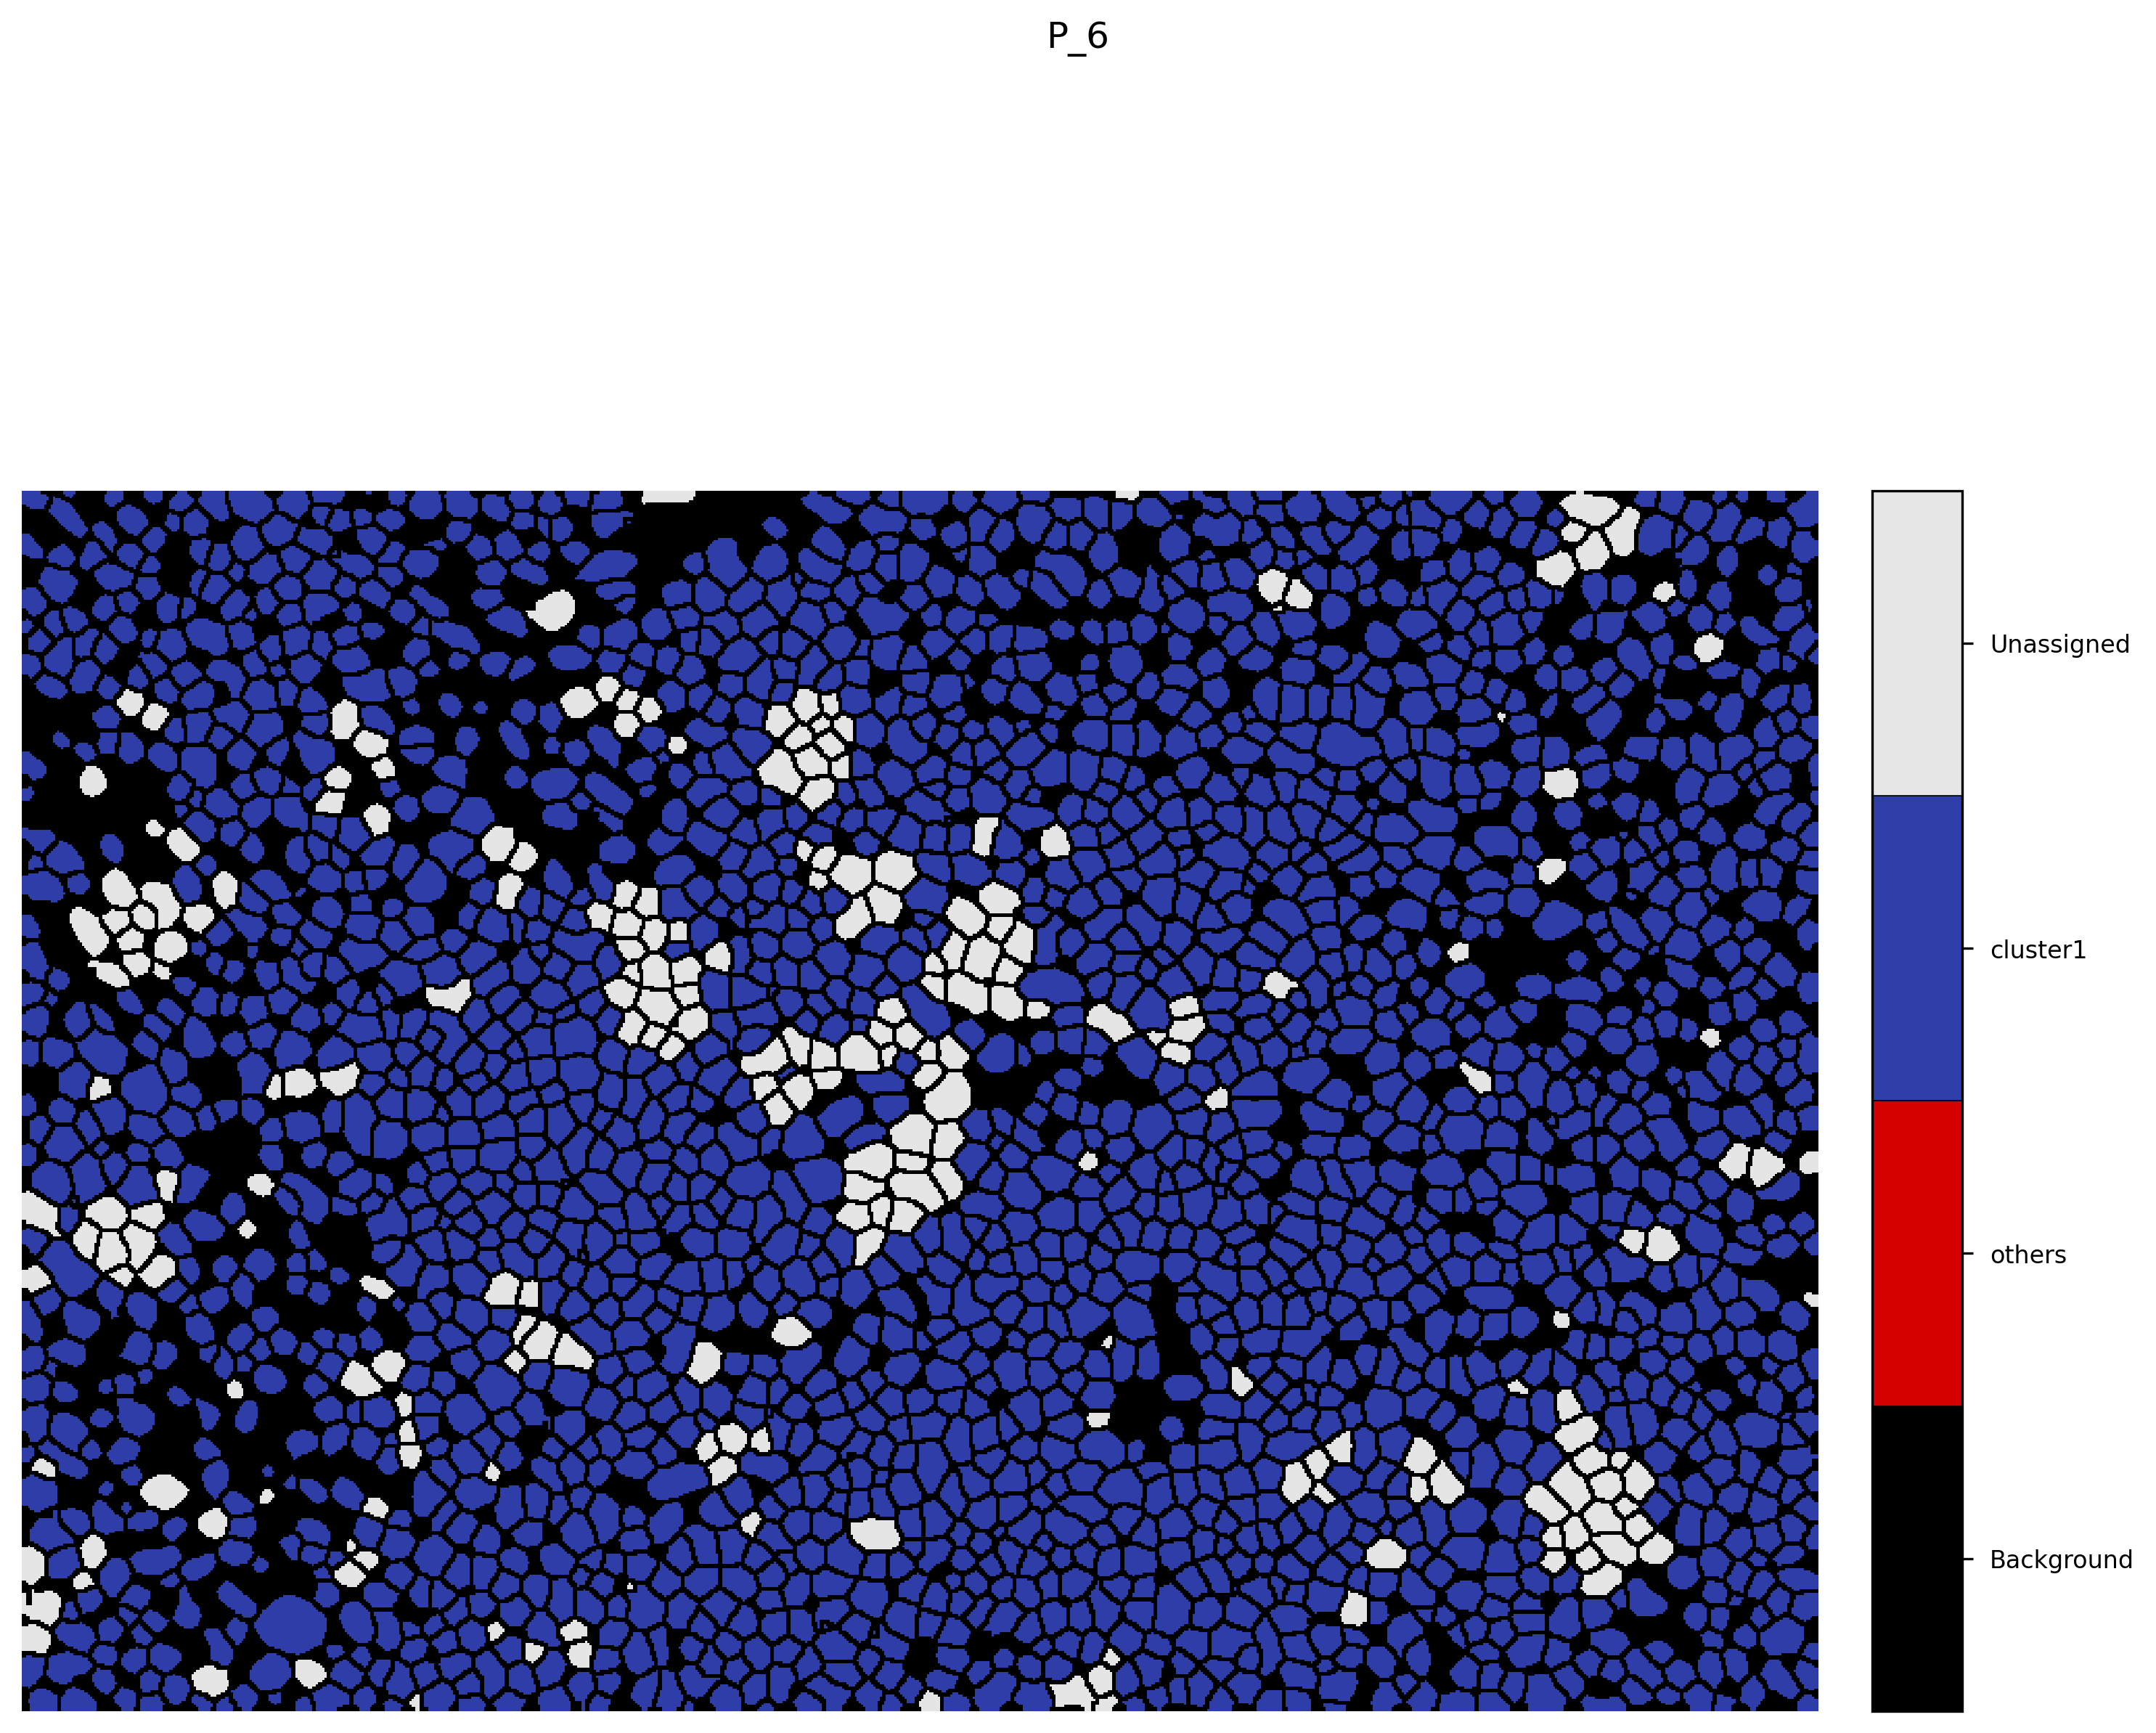

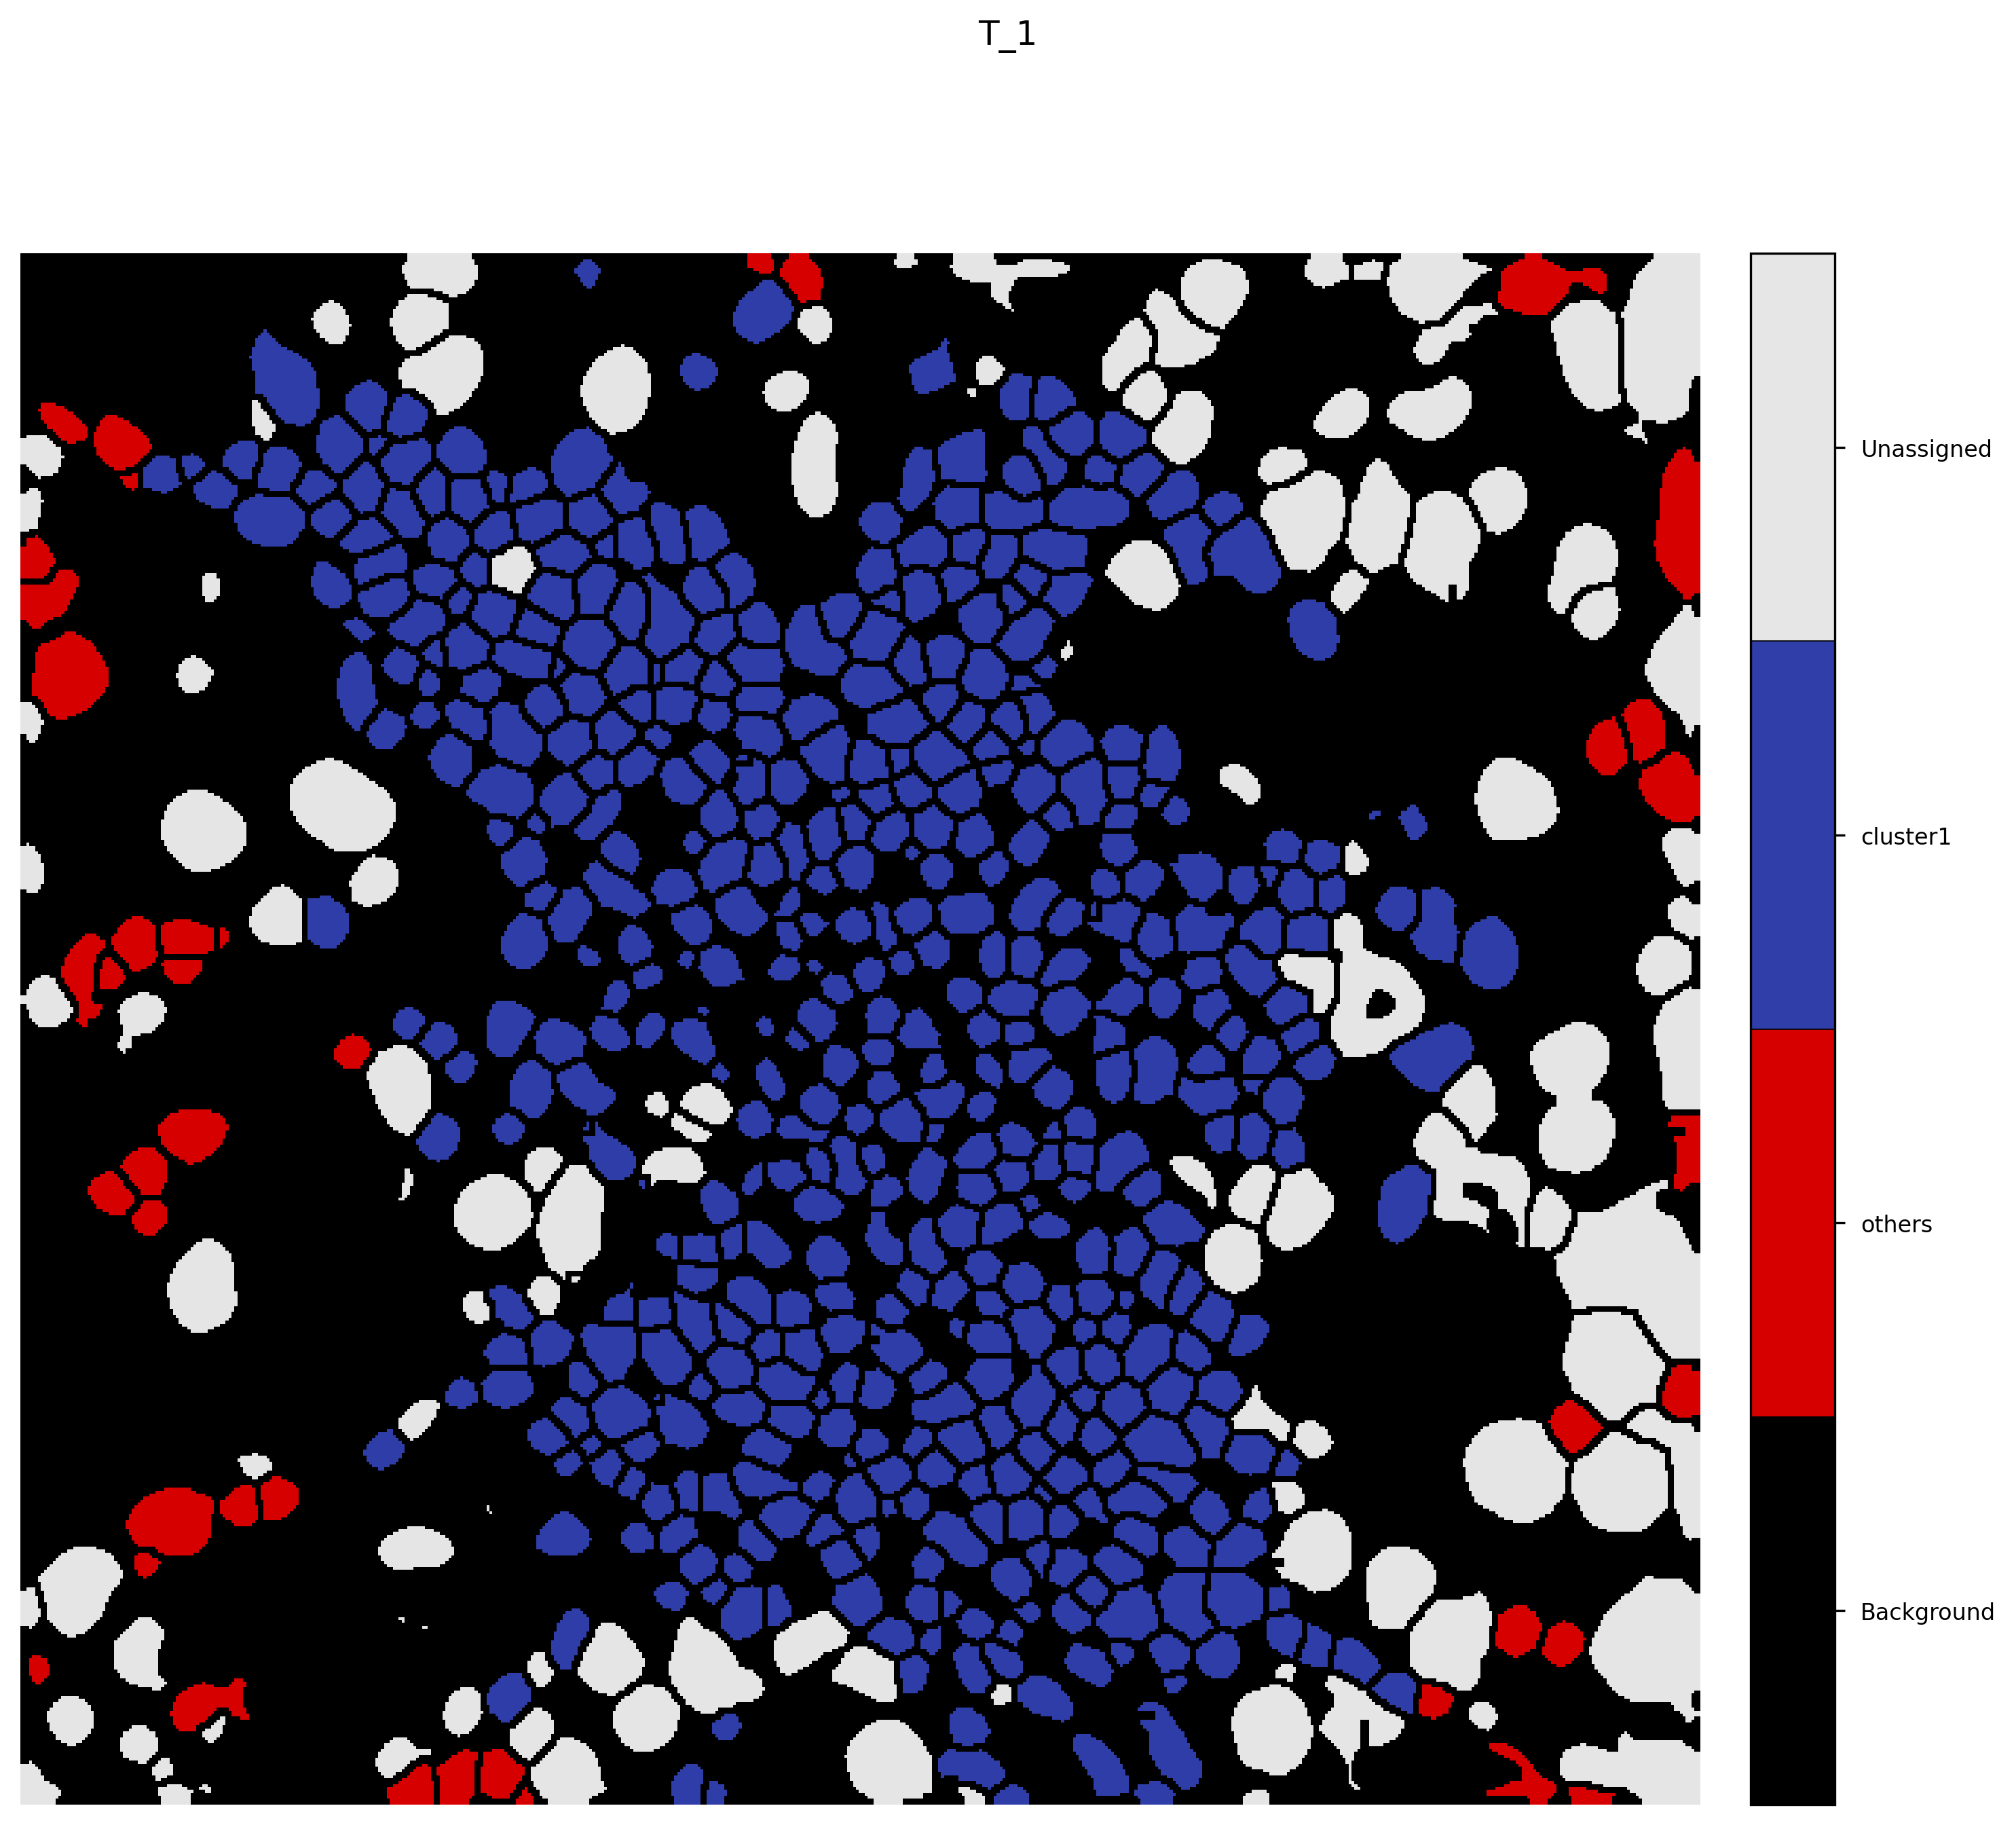

In [ ]:
one_slide = data
replace_dict = {0: 'cluster1', -1: 'others', 1: 'cluster2', 2: 'cluster3', 
                    3: 'cluster4', 4: 'cluster5', 5: 'cluster6', 
                    6: 'cluster7', 7: 'cluster8', 8: 'cluster9', 9: 'cluster10',
                    10: 'cluster11'}
one_slide['cluster_label'] = one_slide['cluster_label'].replace(replace_dict)

cell_cluster = one_slide
cell_cluster = one_slide[['fov','label','cluster_label']]
cell_cluster.rename(columns={'cluster_label': 'cell_meta_cluster'}, inplace=True)
    
    
image_dir = r''
seg_dir = r''
save_dir = r''
    
if not os.path.exists(save_dir):
    os.makedirs(save_dir) 

fovs = ns.natsorted(io_utils.list_folders(image_dir))
cohort_cluster_plot(
    fovs=fovs,
    seg_dir=seg_dir,
    save_dir= save_dir,
    cell_data= cell_cluster,
    erode=True,
    fov_col=settings.FOV_ID,
    label_col=settings.CELL_LABEL,
    cluster_col=settings.CELL_TYPE,
    seg_suffix="_whole_cell.tiff",
    cmap="cet_glasbey_bw_minc_20",
    display_fig=True,
    fig_file_type="png",
    figsize=(10, 10),
    dpi=300,
)